<a href="https://colab.research.google.com/github/vinayghanghav/breast_cancer_prediction/blob/main/Breast_cancer_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [82]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/breast-cancer-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'breast-cancer-dataset' dataset.
Path to dataset files: /kaggle/input/breast-cancer-dataset


In [83]:
df1 = pd.read_csv(path + "/breast-cancer.csv")
df1.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [84]:
df1.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [85]:
y = df1['diagnosis']
x = df1.drop(columns=['diagnosis', 'id'])

In [86]:
# df1.drop(columns=['diagnosis'], inplace=True)

In [87]:
# df1.drop(columns=['id'], inplace=True)

In [88]:
df1

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [89]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

In [90]:
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()
lr_model = LogisticRegression()
svm_model = SVC()

In [91]:
# train the model
knn_model.fit(x_train, y_train)
nb_model.fit(x_train, y_train)
lr_model.fit(x_train, y_train)
svm_model.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC()

In [92]:
# Testing
y_pred_knn =knn_model.predict(x_test)
y_pred_nb =nb_model.predict(x_test)
y_pred_lr =lr_model.predict(x_test)
y_pred_svm =svm_model.predict(x_test)

In [93]:
# evaluation
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           B       0.86      0.97      0.91        66
           M       0.95      0.79      0.86        48

    accuracy                           0.89       114
   macro avg       0.91      0.88      0.89       114
weighted avg       0.90      0.89      0.89       114



In [94]:
# evaluation
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           B       0.90      1.00      0.95        66
           M       1.00      0.85      0.92        48

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



In [95]:
# evaluation
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           B       0.90      1.00      0.95        66
           M       1.00      0.85      0.92        48

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



In [96]:
# evaluation
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           B       0.84      1.00      0.91        66
           M       1.00      0.73      0.84        48

    accuracy                           0.89       114
   macro avg       0.92      0.86      0.88       114
weighted avg       0.90      0.89      0.88       114



In [97]:
# check all respective colunm are same or not
x_train.columns == df1.columns

ValueError: Lengths must match to compare

In [98]:
# count the value of diagnosis
y.value_counts()

,count
diagnosis,
B,357
M,212


In [99]:
# What is the percentage distribution of each diagnosis type?
(y.value_counts(normalize=True) * 100)

,proportion
diagnosis,
B,62.741652
M,37.258348


In [100]:
# What are the top 5 features with highest average values for malignant tumors?
df1.groupby('diagnosis').mean().loc['M'].sort_values(ascending=False).head(5)

,M
id,3.681805e+07
area_worst,1.422286e+03
area_mean,9.783764e+02
perimeter_worst,1.413703e+02
perimeter_mean,1.153654e+02


In [102]:
df1.to_csv('Final1.csv')

In [103]:
# How do the mean values of different features compare between malignant and benign tumors?
mean_features_by_diagnosis = df1.groupby('diagnosis').mean()
display(mean_features_by_diagnosis)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


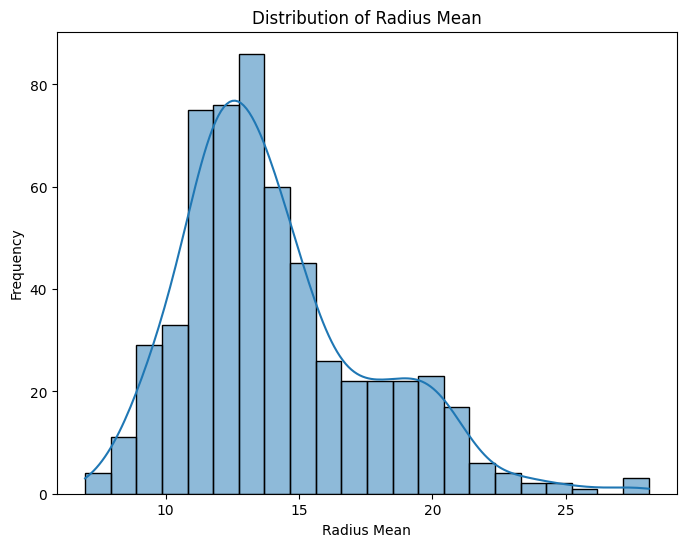

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a histogram of the 'radius_mean' feature
plt.figure(figsize=(8, 6))
sns.histplot(df1['radius_mean'], kde=True)
plt.title('Distribution of Radius Mean')  # Set the title of the plot
plt.xlabel('Radius Mean')  # Set the label for the x-axis
plt.ylabel('Frequency')  # Set the label for the y-axis
plt.show()

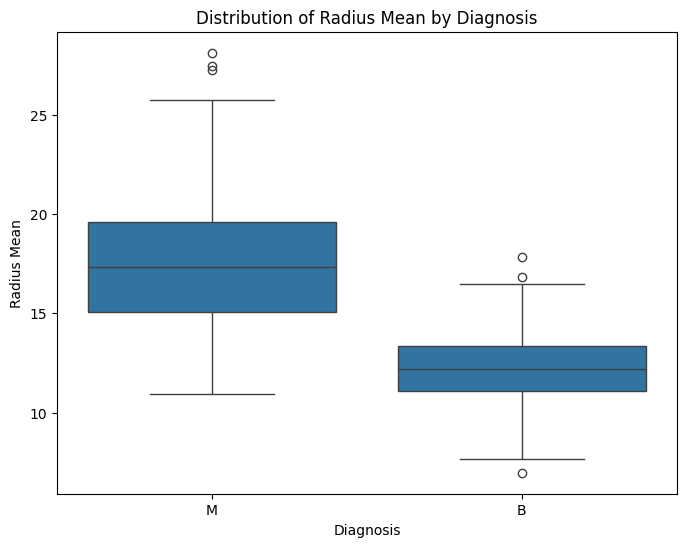

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot of 'radius_mean' by 'diagnosis'
plt.figure(figsize=(8, 6))
sns.boxplot(x='diagnosis', y='radius_mean', data=df1)
plt.title('Distribution of Radius Mean by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Radius Mean')
plt.show()

In [109]:
# Check for missing values
missing_values = df1.isnull().sum()
print("Missing values per column:")
print(missing_values)


Missing values per column:
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [119]:
import pickle

# Save the best model (Logistic Regression) to a pickle file
with open('cancer_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)

print("Best model (Logistic Regression) saved as cancer_model.pkl")

Best model (Logistic Regression) saved as cancer_model.pkl


In [120]:
model_path = "cancer.pkl"


In [121]:
model_path = "models/cancer.pkl"  # if you stored in a subfolder


In [122]:
import pickle

with open("cancer.pkl", "wb") as f:
    pickle.dump(svm_model, f)
print("✅ Model saved successfully!")


✅ Model saved successfully!
